# Final Project - Exploring Machine Learning
### Author: Mahammad Hajiyev
### https://github.com/MahammadHajiyev2024/datafun-07-ml

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

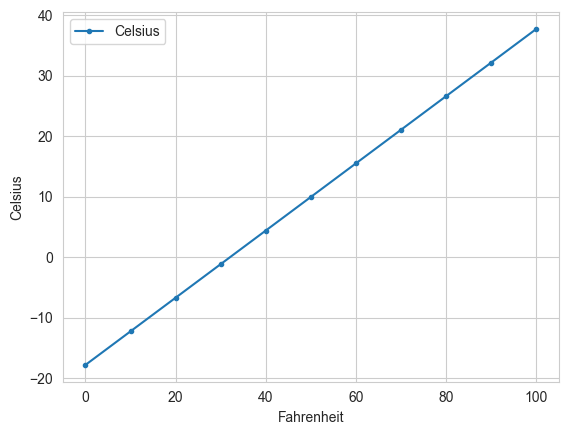

In [313]:
# Lambda function - used to change Farenheit to Celsius
c = lambda f: 5 / 9 * (f - 32)

# Creating tupils and dataframe
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns= ['Fahrenheit', 'Celsius'])

# Drawing the chart
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [314]:
# Loading the Data
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [315]:
# Looking ag the first few rows 
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [316]:
# Looking at the last few rows
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [317]:
# Changing Value to Temprature and showing first three rows with years
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [318]:
# Making the display precision to 2 and describing temperature column
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [319]:
# Finding slope and intercept using linear reg
linear_regression = stats.linregress(x=nyc_df.Date,y=nyc_df.Temperature)
linear_regression.slope

0.014771361132966163

In [320]:
# y-intercept
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

In [321]:
# Average temperature in January, 2024
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

In [322]:
# Average temperature in January, 1890
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

### Section 7 - Visualizations

(10.0, 70.0)

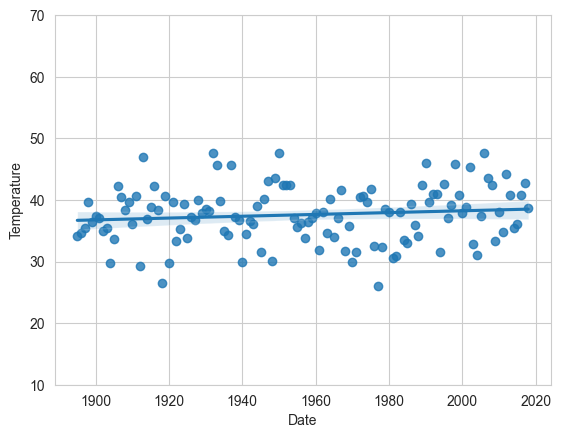

In [323]:
# Plotting the chart using regression line
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)

## Part 3: Prediction


### Section 1 - Build the Model

In [324]:
# Split the data in to test and training sets.
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11)

In [325]:
# Looking at shapes of the training dataset
X_train.shape

(93, 1)

In [326]:
# Looking at shapes of the testing dataset
X_test.shape

(31, 1)

In [327]:
# Train the model
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [328]:
# Display slope
linear_regression.coef_

array([0.01939167])

In [329]:
# Display intercept
linear_regression.intercept_

-0.30779820252656975

### Section 2 - Test the Model

In [330]:
# Making predictions and printing predicted and expected values to compare
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [331]:
# Predict temprature for 2024
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

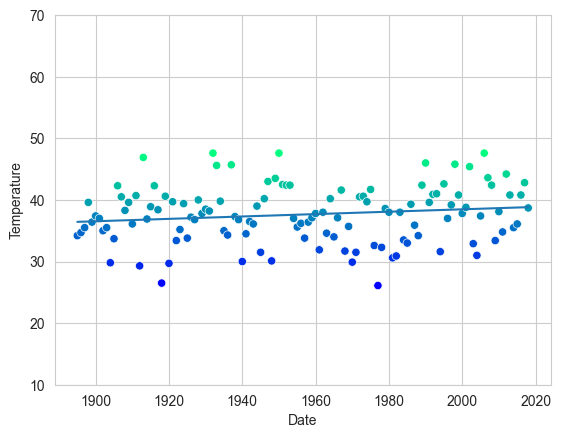

In [332]:
# Starting the scatter plot
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

# Add the regression line.
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Part 4 - Insights

The dataset from 1895 to 2018 shows a gradual rise in temperatures, with an average of 37.6°C and moderate variability, as indicated by a standard deviation of 4.54°C. Over time, temperatures have been trending upward, and recent years display more frequent positive anomalies, where recorded temperatures exceed historical averages. This suggests a shift toward warmer climate conditions, especially in the later part of the dataset. The range of temperatures, from a minimum of 26.1°C to a maximum of 47.6°C, underscores significant fluctuations, but overall the long-term trend points toward increasing warmth.

A linear regression model applied to the data confirms this upward trend, predicting a steady rise in temperatures. In recent years, actual recorded temperatures have often exceeded the model's predictions, indicating that the rate of temperature increase might be accelerating. The model predicts temperatures in the 37-39°C range for the most recent years, yet observed values are higher. These patterns point to a warming climate, with the shift being especially noticeable in the last few decades.

When comparing SciPy’s linregress function and scikit-learn's LinearRegression model, both are useful for identifying linear relationships, but they have different strengths. SciPy's linregress is a straightforward tool that quickly provides the slope, intercept, and R-squared value, making it ideal for simple, one-off linear regressions. It's a great option for quick trend analysis without much setup. In contrast, scikit-learn's LinearRegression model is more robust, offering greater flexibility for building complex models and making predictions. While linregress excels in simplicity, scikit-learn’s method is better suited for tasks requiring deeper analysis, like handling more data or predicting future values. The choice between the two depends on whether you need quick insights or a more comprehensive predictive model.